# 데이텀 주식회사의 데이터 과학자 명단

In [6]:
users = [
	{"id": 0, "name": "Hero"},
	{"id": 1, "name": "Dunn"},
	{"id": 2, "name": "Sue"},
	{"id": 3, "name": "Chi"},
	{"id": 4, "name": "Thor"},
	{"id": 5, "name": "Clive"},
	{"id": 6, "name": "Hicks"},
	{"id": 7, "name": "Devin"},
	{"id": 8, "name": "Kate"},
	{"id": 9, "name": "Klein"}
]

## 목표 : 핵심 인물 찾기
 - 아래는 서로 친구인 데이터 과학자들의 데이터

In [7]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

![데이텀의 사용자 네트워크](https://www.safaribooksonline.com/library/view/data-science-from/9781491901410/assets/dsfs_0102.png "데이텀의 사용자 네트워크")

## 자료구조 만들기

In [8]:
# 각 사용자의 friends 속성에 빈 list를 할당
for user in users:
	user["friends"] = []

# friendships 데이터를 이용하여 각 list에 값을 할당
for i, j in friendships:
	# users[i]에서 i는 각 사용자의 id와 같으므로 이를 이용해서 친구를 추가함
	users[i]["friends"].append(users[j])
	users[j]["friends"].append(users[i])

## 데이터 확인

In [9]:
for user in users:
	print (user)
	print ()

{'id': 0, 'name': 'Hero', 'friends': [{'id': 1, 'name': 'Dunn', 'friends': [{...}, {'id': 2, 'name': 'Sue', 'friends': [{...}, {...}, {'id': 3, 'name': 'Chi', 'friends': [{...}, {...}, {'id': 4, 'name': 'Thor', 'friends': [{...}, {'id': 5, 'name': 'Clive', 'friends': [{...}, {'id': 6, 'name': 'Hicks', 'friends': [{...}, {'id': 8, 'name': 'Kate', 'friends': [{...}, {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]}, {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]}, {'id': 7, 'name': 'Devin', 'friends': [{...}, {'id': 8, 'name': 'Kate', 'friends': [{'id': 6, 'name': 'Hicks', 'friends': [{...}, {...}]}, {...}, {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]}]}]}]}]}, {'id': 3, 'name': 'Chi', 'friends': [{...}, {'id': 2, 'name': 'Sue', 'friends': [{...}, {...}, {...}]}, {'id': 4, 'name': 'Thor', 'friends': [{...}, {'id': 5, 'name': 'Clive', 'friends': [{...}, {'id': 6, 'name': 'Hicks', 'friends': [{...}, {'id': 8, 'name': 'Kate', 'friends': [{...}, {'id': 7, 'name': 'Devin', 'friend

### user의 친구수?

In [10]:
def number_of_friends(user):
	return len(user["friends"])

total_connections = sum(number_of_friends(user) for user in users)
print("총 연결 수: ", total_connections)

총 연결 수:  24


### 평균 친구수?

In [11]:
num_users = len(users)  # 사람 수
avg_connections = total_connections / num_users  # 평균 친구 수
print("사용자 수: ", num_users)
print("평균 연결 수: ", total_connections / num_users)

사용자 수:  10
평균 연결 수:  2.4


### 친구가 가장 많은 사용자는?

In [12]:
# (사용자 id, 친구 수)
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

print("친구 수를 기준으로 정렬된 사용자들")
print(sorted(num_friends_by_id, key=lambda pair: pair[1],reverse=True))

친구 수를 기준으로 정렬된 사용자들
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


## 데이터 과학자 추천하기
 - 친구 추천 기능? 서로 아는 친구가 몇명일까?
 - 아래는 user[0]의 친구인 user[1],user[2]의 친구 id를 리스트로 반환한다.
 - 이건 별로 좋지 않은듯...

In [13]:
def friends_of_friend_ids_bad(user):
	return [foaf["id"]
	        for friend in user["friends"]   # user의 각각의 친구에 대해서
	        for foaf in friend["friends"]]  # 그들의 친구들을 찾아준다.

print (friends_of_friend_ids_bad(users[0]))

[0, 2, 3, 0, 1, 3]


 - 그렇다면 서로 아는 친구는?
 - 사용자가 이미 아는 사람은 제외한다.

In [14]:
from collections import Counter

def not_the_same(user, other_user):
	"""id가 서로 다르면 같지 않다."""
	return user["id"] != other_user["id"]

def not_friends(user, other_user):
	"""만약 other_user가 user["friends"]에 포함되지 않으면
	친구가 아닌 것으로 간주함."""
	return all(not_the_same(friend, other_user)
	           for friend in user["friends"])

def friends_of_friend_ids(user):
	return Counter(foaf["id"]
	               for friend in user["friends"]  # 사용자의 각각의 친구에 대해
	               for foaf in friend["friends"]  # 그들의 친구들을 또 살펴봅니다.
	               if not_the_same(user, foaf)    # 그 친구의 친구가 내가 아니고,
	               and not_friends(user, foaf))   # 내 친구가 내 친구가 아닌 경우에 추가함.

print (friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


### 관심사를 추가

In [15]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

### 관심사가 같은 데이터 과학자를 찾아라!!!

In [16]:
def data_scientists_who_like(target_interest):
	return [user_id
	        for user_id, user_interest in interests
	        if user_interest == target_interest]

 - 위 코드의 문제점?
 - 호출할 때마다 interests 리스트를 쭈우우욱 훑어야한다..
 - 만약...amazon이라면???
 - 미리미리 인덱스를 만들자..

In [17]:
from collections import defaultdict

# key는 관심사, value는 사용자id 인 사전 객체
user_ids_by_interests = defaultdict(list)

for user_id, interest in interests:
	user_ids_by_interests[interest].append(user_id)
	
# key는 사용자id, value는 관심사 인 사전 객체
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
	interests_by_user_id[user_id].append(interest)

특정 사용자가 주어졌을 때, 사용자와 가장 유사한 관심사를 가진 사람이 누구????
1. 해당 사용자의 관심사들을 훑는다.
2. 각 관심사를 가진 다른 사용자들이 누구인지 찾아본다.
3. 다른 사용자들이 몇 번이나 등장하는지 센다.

In [18]:
def most_common_interests_with(user_id):
	return Counter(interested_user_id
	               for interest in interests_by_user_id[user_id]
	               for interested_user_id in user_ids_by_interests[interest]
	               if interested_user_id != user_id)

print()
print("######################")
print("#")
print("# 나랑 관심사가 유사한 사람들")
print("#")
print("######################")
print()
print("user0과 관심사가 유사한 사람들 : ", most_common_interests_with(users[0]["id"]))


######################
#
# 나랑 관심사가 유사한 사람들
#
######################

user0과 관심사가 유사한 사람들 :  Counter({9: 3, 1: 2, 8: 1, 5: 1})


## 연봉과 경력의 상관관계???

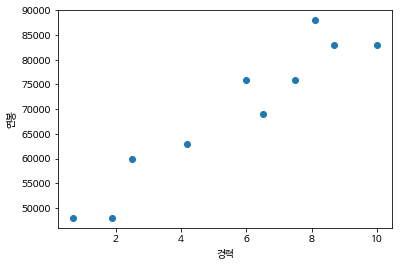

In [19]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

def make_chart_salaries_by_tenure():
	tenures = [tenure for salary, tenure in salaries_and_tenures]
	salaries = [salary for salary, tenure in salaries_and_tenures]
	plt.scatter(tenures, salaries)
	plt.xlabel("경력")
	plt.ylabel("연봉")
	plt.show()

font_location = "D:/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

make_chart_salaries_by_tenure()

 - 경력이 많으면 연봉도 높다?
 - 조금 더 살펴볼까?
 - 경력에 따라 평균 연봉이 어떻게 달라지는지 알아보자.

In [20]:
# key는 경력, value는 연봉
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
	salary_by_tenure[tenure].append(salary)
	
# key는 경력, value는 해당 경력의 평균 연봉
average_salary_by_tenure = {
	tenure : sum(salaries) / len(salaries)
	for tenure, salaries in salary_by_tenure.items()
}

print("경력별 평균연봉")
print(average_salary_by_tenure)

경력별 평균연봉
{0.7: 48000.0, 1.9: 48000.0, 2.5: 60000.0, 4.2: 63000.0, 6.5: 69000.0, 6: 76000.0, 7.5: 76000.0, 8.1: 88000.0, 10: 83000.0, 8.7: 83000.0}


- 위 데이터는 별로 의미가 없다.
- 근속 연수가 같은 사용자가 많다면 의미가 있을것.

- 차라리 아래와 같이 경력을 몇개의 구간으로 나누고

In [21]:
def tenure_bucket(tenure):
	if tenure < 2:
		return "less than two"
	elif tenure < 5:
		return "between two and five"
	else:
		return "more than five"

- 각 연봉을 해당 구간에 매핑하자.

In [25]:
# key는 경력 구간, value는 해당 구간에 속하는 사용자들의 연봉
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
	bucket = tenure_bucket(tenure)
	salary_by_tenure_bucket[bucket].append(salary)

for key, value in salary_by_tenure_bucket.items():
	print ( key, value)
# print (salary_by_tenure_bucket)

between two and five [60000, 63000]
less than two [48000, 48000]
more than five [83000, 88000, 76000, 69000, 76000, 83000]


- 마지막으로 각 구간의 평균 연봉을 구해보면,

In [28]:
# key는 경력 구간, value는 해당 구간에 속하는 사용자들의 평균 연봉
average_salary_by_bucket = {
	tenure_bucket : sum(salaries) / len(salaries)
	for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

for key, value in average_salary_by_bucket.items():
	print ( key, value)
# print (average_salary_by_bucket)

less than two 48000.0
between two and five 61500.0
more than five 79166.66666666667


위 결과를 통해 다음과 같이 말할 수 있다.
- 5년 이상의 경력을 가진 데이터 과학자들은 경력이 없거나 적은 데이터 과학자들보다 65%나 더 번다!
여기서는 임의의 구간을 나누었지만, 경력이 1년 증가함에 따라 연봉이 평균적으로 어떻게 변하는지를 알아보는 것도 좋다.
- 이 데이터로 연봉을 예측할 수도 있다. 이는 14장 "단순 회귀 분석"에서 알아본다.

## 유료계정???

아래는 유료계정을 사용하는 사용자들의 데이터이다.

0.7 paid
1.9 unpaid
2.5 paid
4.2 unpaid
6   unpaid
6.5 unpaid
7.5 unpaid
8.1 unpaid
8.7 paid
10  paid
- 경력이 매우 짧거나 아주 긴 경우에는 유료 계정을 사용하는 경향이 있고, 근속 연수가 평균치 내외인 경우에는 그렇지 않은것 같다.
- 따라서, 데이터가 부족하기는 해도 경력에 따라 유료 계정 사용 여부를 예측할 수 있는 간단한 모델을 만들어 볼 수 있다.
- 그렇다. 이것도 모델이다...
- 더 많은 데이터와 약간의 수학을 가미한다면, 사용자의 경력에 따라 사용자가 유료 계정으로 전환할 가능성을 계산할 수 있다.
 - 이런 종류의 문제는 16장에서 다룬다.

In [30]:
def predict_paid_or_unpaid(years_experience):
	if years_experience < 3.0:
		return "paid"
	elif years_experience < 8.5:
		return "unpaid"
	else:
		return "paid"

## 관심주제

그다지 좋은 방법은 아니지만, 사용자들의 관심 데이터의 단어 수를 세서 가장 인기가 많은 관심사를 찾아봤다.
1. 모든 관심사를 소문자로 변환한다.
2. 모든 관심사를 단어 기준으로 쪼갠다.
3. 각 단어의 수를 센다.

In [32]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

# 이중에서 두 번 이상 등장하는 단어들만 출력
for word, count in words_and_counts.most_common():
	if count > 1:
		print (word, count)

java 3
learning 3
big 3
python 3
data 3
statistics 2
networks 2
scikit-learn 2
neural 2
probability 2
r 2
machine 2
cassandra 2
hadoop 2
regression 2
hbase 2


위 데이터에서 주제를 뽑는 방법은 20장 "자연어 처리"에서 다룬다.